In [236]:
## import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [237]:
# Load dataset

df = pd.read_excel("datasets/exploratory_study_of_mental_health_among_gamers_in_gabon_and_tunisia.xlsx")
df

,Participants,Educ,Age,Mhog/w,Mmog/g,Ag,Pg,Eg,Ng,Smart,Tablet,Comput,Consol,Ins,EDS,Anx,Dep
0,h,b,18,20,29,0,0,1,0,1,0,0,0,6,6,8,8
1,h,b,22,9,36,0,0,0,1,1,0,0,0,5,4,4,4
2,h,b,17,21,25,0,0,1,0,1,0,0,0,6,7,4,4
3,h,b,29,23,31,0,1,0,0,1,0,0,0,12,14,10,4
4,h,b,23,18,24,0,0,0,1,1,0,0,0,5,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,f,b,26,23,23,0,1,0,0,1,0,0,0,12,14,8,4
297,f,b,27,14,28,0,0,0,1,0,1,0,0,5,4,4,5
298,f,b,19,11,32,0,0,0,1,0,1,0,0,6,8,4,6
299,f,b,20,22,32,0,1,0,0,0,1,0,0,12,10,8,4


In [238]:

## Create Cluster based on anixeaty and depression
scaller  = MinMaxScaler()
depression_df = df[['Anx',"Dep"]]
depression_df = scaller.fit_transform(depression_df)
cluster_nums = list(range(2,10))
cluster_score = []

for cluster_num in cluster_nums:
    cluster = KMeans(n_clusters=cluster_num,random_state=1)
    scoring = cluster.fit(depression_df)
    cluster_score.append(scoring.inertia_)
    


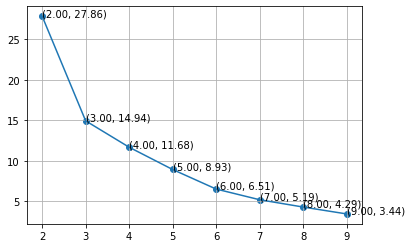

In [239]:
## Select best cluster nums
plt.plot(cluster_nums,cluster_score)
plt.scatter(cluster_nums,cluster_score)
for xy in zip(cluster_nums,cluster_score):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
plt.grid(True)
plt.show()

## From the graph, has 5 clutser

In [240]:
## Add Cluster to for information

stress_cluster = KMeans(n_clusters=4,random_state=4)
stress_cluster = stress_cluster.fit_predict(depression_df)
df['stress_cluster'] = stress_cluster
df.head(5)

,Participants,Educ,Age,Mhog/w,Mmog/g,Ag,Pg,Eg,Ng,Smart,Tablet,Comput,Consol,Ins,EDS,Anx,Dep,stress_cluster
0,h,b,18,20,29,0,0,1,0,1,0,0,0,6,6,8,8,0
1,h,b,22,9,36,0,0,0,1,1,0,0,0,5,4,4,4,3
2,h,b,17,21,25,0,0,1,0,1,0,0,0,6,7,4,4,3
3,h,b,29,23,31,0,1,0,0,1,0,0,0,12,14,10,4,1
4,h,b,23,18,24,0,0,0,1,1,0,0,0,5,5,4,6,2


Text(0, 0.5, 'Depression')

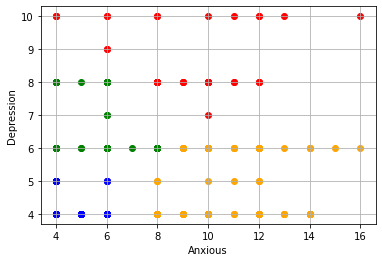

In [241]:
## Display Scatter
colors = ['red','orange','green','blue']

for i,cluster in enumerate(list(df['stress_cluster'].sort_values().unique())):
    cluster_df = df[df['stress_cluster']==cluster]
    plt.scatter(cluster_df['Anx'],cluster_df['Dep'],color=colors[i])
plt.grid(True)
plt.xlabel('Anxious')
plt.ylabel('Depression')


## Drawback
- Red = People with high Anxious and Depression
- Orange = People with medium to high Anxious and medium Depression
- Yellow = People with low Anxious and medium Depression
- Green = People with low Anxious and low Depression

In [242]:
cluster_desc = ['People with high Anxious and high Depression','People with medium to high Anxious and medium Depression','People with low Anxious and medium Depression','People with low Anxious and low Depression']

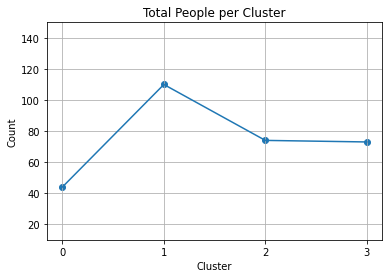

In [243]:
## Cluster Depression Count
stess_df = df.copy()
cluster_stress = stess_df[['stress_cluster']].groupby(['stress_cluster'])['stress_cluster'].count().to_frame('count').reset_index()

plt.axis(True)
plt.grid(True)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.ylim(bottom=10,top=150)
plt.xticks(cluster_stress['stress_cluster'])
plt.title("Total People per Cluster")
plt.plot(cluster_stress['stress_cluster'],cluster_stress['count'])
plt.scatter(cluster_stress['stress_cluster'],cluster_stress['count'])


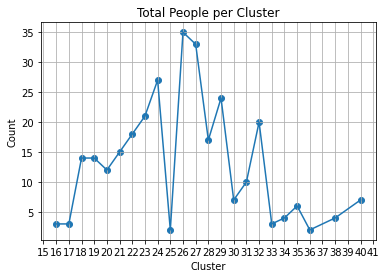

In [244]:
## Age Depression Count
stess_df = df.copy()
cluster_stress = stess_df[['Age']].groupby(['Age'])['Age'].count().to_frame('count').reset_index()

plt.axis(True)
plt.grid(True)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(list(range(10,cluster_stress['Age'].max()+10)))
plt.title("Total People per Cluster")
plt.plot(cluster_stress['Age'],cluster_stress['count'])
plt.scatter(cluster_stress['Age'],cluster_stress['count'])

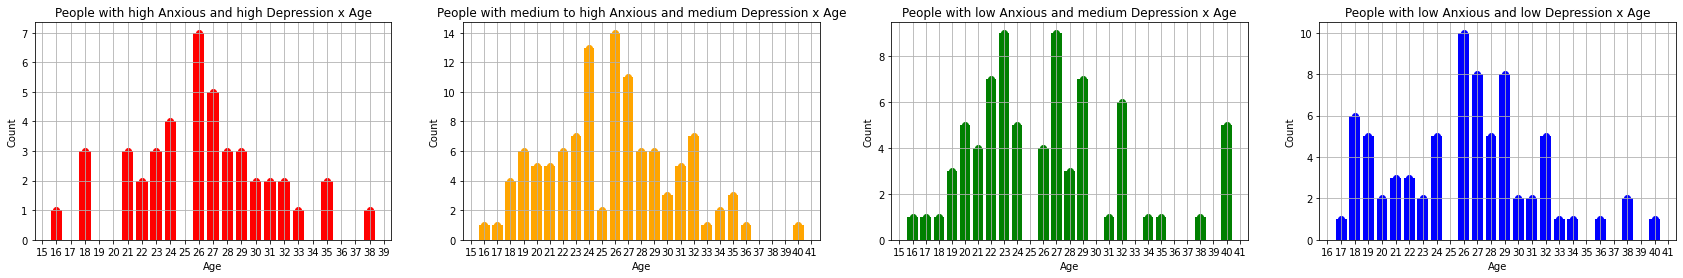

In [246]:
## Cluster X AGE Count
anx_dep_grade = df.copy()
cluster_x_age = anx_dep_grade[['stress_cluster','Age']].groupby(['stress_cluster','Age'])['Age'].count().to_frame("count").reset_index()
cluster_x_age

plt.figure(figsize=(10,4))
columns = 5
rows = 1

for i,cluster in enumerate(list(cluster_x_age['stress_cluster'].unique())):
    cluster_age = cluster_x_age[cluster_x_age['stress_cluster']==cluster]
    plt.subplot(rows, columns, i+1)
    plt.axis(True)
    plt.grid(True)
    plt.xlabel("Age")
    plt.xticks(list(range(10,cluster_stress['Age'].max()+10)))
    plt.ylabel("Count")
    plt.title("{} x Age".format(cluster_desc[i]))
    plt.bar(cluster_age['Age'],cluster_age['count'],color=colors[i])
    plt.scatter(cluster_age['Age'],cluster_age['count'],color=colors[i])
plt.subplots_adjust(right=3)
